## Import Libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from sklearn.linear_model import LinearRegression
sys.path.append('../')

## Reading Dataset

In [2]:
df = pd.read_csv("../datasets/calculated_features_final19356_253493_147567893553946290238604574175400014296.csv")
print(list(df.columns))
print(df.shape)

['scout_id', 'match_week', 'player_id', 'team_id', 'delta_price', 'position_id', 'year', 'name', 'has_played', 'score', 'average_points_last_1_rounds', 'average_price_last_1_rounds', 'team_points_last_1_rounds', 'team_goals_scored_last_1_rounds', 'team_goals_taken_last_1_rounds', 'enemy_goals_scored_last_1_rounds', 'enemy_goals_taken_last_1_rounds', 'enemy_points_last_1_rounds', 'home_team', 'team_goals_taken_last_1_rounds.1', 'average_plays_last_1_rounds_rb_play', 'average_plays_last_1_rounds_fc_play', 'average_plays_last_1_rounds_gc_play', 'average_plays_last_1_rounds_ca_play', 'average_plays_last_1_rounds_cv_play', 'average_plays_last_1_rounds_sg_play', 'average_plays_last_1_rounds_dd_play', 'average_plays_last_1_rounds_dp_play', 'average_plays_last_1_rounds_gs_play', 'average_plays_last_1_rounds_fs_play', 'average_plays_last_1_rounds_pe_play', 'average_plays_last_1_rounds_a_play', 'average_plays_last_1_rounds_ft_play', 'average_plays_last_1_rounds_fd_play', 'average_plays_last_1_ro

## Pre Processing

In [3]:
auxiliary = ['scout_id', 'match_week', 'player_id', 'team_id', 'position_id',
             'home_team.1', 'home_team.2', 'home_team.3', 'year', 'name', 'has_played',
             'team_goals_taken_last_1_rounds.1', 'team_goals_taken_last_5_rounds.1',
             'team_goals_taken_last_10_rounds.1', 'team_goals_taken_last_20_rounds.1', 'delta_price']

In [4]:
from data_science_utils.data_processing.data_processing import DatasetProcessing
dp = DatasetProcessing(df, auxiliary)
dp.correct_dataset()
dp.count_null()
dp.drop_zero_var()
dp.drop_null(max_null_ratio=0.4)
df = dp.hot_encode()
dp.fill_null(value = 0, feature_list=list(df.columns))

average_points_last_1_rounds......................1775
average_price_last_1_rounds.......................1775
team_points_last_1_rounds.........................770
team_goals_scored_last_1_rounds...................770
team_goals_taken_last_1_rounds....................770
enemy_goals_scored_last_1_rounds..................819
enemy_goals_taken_last_1_rounds...................819
enemy_points_last_1_rounds........................819
home_team.........................................241
average_plays_last_1_rounds_rb_play...............1775
average_plays_last_1_rounds_fc_play...............1775
average_plays_last_1_rounds_gc_play...............1775
average_plays_last_1_rounds_ca_play...............1775
average_plays_last_1_rounds_cv_play...............1775
average_plays_last_1_rounds_sg_play...............1775
average_plays_last_1_rounds_dd_play...............1775
average_plays_last_1_rounds_dp_play...............1775
average_plays_last_1_rounds_gs_play...............1775
average_plays_las

../data_science_utils/data_processing/data_processing.py:53: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  enc.fit(self.df.position_id.reshape(-1, 1))
../data_science_utils/data_processing/data_processing.py:54: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  position_encoded = enc.transform(self.df.position_id.reshape(-1, 1)).toarray()




FEATURES FILLED WITH 0



In [5]:
print(df.shape)

(32733, 114)


## Feature Visualization

## Feature Selection

## Train, validation, test

In [6]:
from data_science_utils.data_processing.train_test_split import TrainTest
tts = TrainTest(df, auxiliary)
tts.split_dataset(train_ratio=0.8)
tts.normalize_data()

/home/noixd/Projects/cartolaAPI/env_cartola/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
model = LinearRegression
model_params = {}
model, train_preds, train_eval = tts.evaluate_train(model, model_params)
test_preds, test_eval = tts.evaluate_test()

Evaluating Train Data: 
Prediction Std Dev: 0.956568877442
Prediction Avg: 2.55758396746
Desired Std Dev: 4.06940279145
Desired Avg: 2.5575727488
Explained Variance: 0.0552519720623
Mean Absolute error: 2.97247396687
RMS Error: 3.9553842117582603
Median Abs Error: 2.36127725917
R2 Score: 0.0552519720547
Evaluating Test Data: 
Prediction Std Dev: 0.953769136677
Prediction Avg: 2.55434375212
Desired Std Dev: 3.98643812063
Desired Avg: 2.62378188483
Explained Variance: 0.0424168148017
Mean Absolute error: 2.96028989099
RMS Error: 3.901593997253703
Median Abs Error: 2.36802164393
R2 Score: 0.0421134075107


## Result Analysis

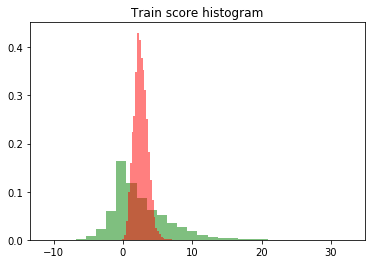

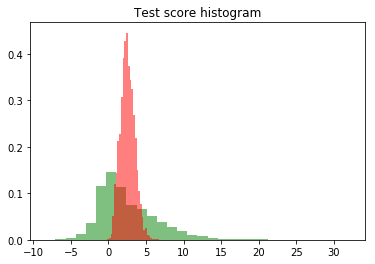

In [8]:
from data_science_utils.result_analysis.visualization import ResultsVisualization
rv = ResultsVisualization( y_test = tts.y_test, test_score=test_preds,
                          y_train = tts.y_train, train_score=train_preds, model=tts.model)
rv.score_hist()

In [9]:
from data_science_utils.result_analysis.evaluation_metrics import EvaluationMetrics
em = EvaluationMetrics(df=df, y_train=tts.y_train, y_test=tts.y_test,
                       train_score=train_preds, test_score=test_preds)

In [10]:
_ = em.eval_top(match_week=20, year=2016, number_of_players=50, real=True)

Top 50 real performances compared to expected performance for position all on round 20 on year 2016
Evaluating Data: 
Predited total points: 149.113545576
Real total points: 430.2
Prediction Std Dev: 0.982457107065
Prediction Avg: 2.98227091151
Desired Std Dev: 3.15156849838
Desired Avg: 8.604
Explained Variance: -0.0884287965605
Mean Absolute error: 5.62172908849
RMS Error: 6.51264391076768
Median Abs Error: 4.83528646154
R2 Score: -3.27032731603






In [11]:
_ = em.eval_top(match_week=20, year=2016, number_of_players=50, real=False)

Top 50 Predicted players metrics compared to real performance for position all on round 20 on year 2016
Evaluating Data: 
Predited total points: 194.152241865
Real total points: 210.3
Prediction Std Dev: 0.53656680501
Prediction Avg: 3.88304483729
Desired Std Dev: 4.439567997
Desired Avg: 4.206
Explained Variance: -0.0105345171749
Mean Absolute error: 3.45118253529
RMS Error: 4.474561082887454
Median Abs Error: 3.02737426758
R2 Score: -0.0158263125064






In [12]:
best_real_team, _ = em.get_best_team(match_week=20, year=2016, team_formation=(2,2,3,3), real=True)
best_predicted_team, _ = em.get_best_team(match_week=20, year=2016, team_formation=(2,2,3,3), real=False)

Selecting best real performing team for match_week 20 on year 2016 
Evaluating Data: 
Predited total points: 28.39530433
Real total points: 137.6
Prediction Std Dev: 0.51907564866
Prediction Avg: 2.839530433
Desired Std Dev: 1.8537529501
Desired Avg: 13.76
Explained Variance: 0.0771829150873
Mean Absolute error: 10.920469567
RMS Error: 11.0647107596388
Median Abs Error: 10.3250325553
R2 Score: -34.626767604




Selecting best predicted performing team for match_week 20 on year 2016 
Evaluating Data: 
Predited total points: 46.8818155604
Real total points: 48.0
Prediction Std Dev: 0.451775953512
Prediction Avg: 4.68818155604
Desired Std Dev: 2.70148107526
Desired Avg: 4.8
Explained Variance: 0.0110621062621
Mean Absolute error: 2.45092895508
RMS Error: 2.6888235555552114
Median Abs Error: 2.44685668945
R2 Score: 0.00934884723094






In [13]:
best_real_team.style

,scout_id,match_week,player_id,team_id,position_id,score,preds,name,year,has_played
38508,88754,20,62130,266,2,14.1,3.49355,William Matheus,2016,True
4259,27304,20,42145,275,2,11.3,2.85524,Egídio,2016,True
7270,31061,20,78248,277,3,13.2,3.38997,Gustavo Henrique,2016,True
36311,84083,20,72605,275,3,12.2,2.15639,Vitor Hugo,2016,True
17191,41141,20,78548,277,4,16.5,2.59474,Jean Mota,2016,True
7742,32814,20,91102,287,4,13.7,2.20668,Flávio,2016,True
42668,96631,20,38421,283,4,12.2,2.18898,Rafinha,2016,True
17773,50114,20,38910,277,5,17.6,3.32967,Ricardo Oliveira,2016,True
11062,38061,20,90302,284,5,13.9,2.73836,Pedro Rocha,2016,True
23472,59631,20,86757,284,5,12.9,3.44173,Everton,2016,True


In [14]:
best_predicted_team.style

,scout_id,match_week,player_id,team_id,position_id,score,preds,name,year,has_played
11772,39182,20,68725,287,2,8.7,5.63069,Diego Renan,2016,True
31338,73779,20,78850,303,2,8.5,4.63057,Reinaldo,2016,True
11919,39416,20,80853,284,3,4.1,4.7491,Pedro Geromel,2016,True
5068,24585,20,68887,266,3,6.7,3.95961,Gum,2016,True
32750,76137,20,87863,283,4,3.8,5.21748,Arrascaeta,2016,True
16472,47969,20,87999,266,4,0.7,4.92024,Gustavo Scarpa,2016,True
29927,70420,20,87552,277,4,5.8,4.28963,Vitor Bueno,2016,True
36482,84370,20,68952,287,5,6.2,4.57576,Marinho,2016,True
5706,29592,20,42116,283,5,1.2,4.4554,Willian,2016,True
39841,89976,20,37798,283,5,2.3,4.45332,Rafael Sobis,2016,True


In [15]:
for position in range(2,6):
    em.eval_top(position=position, match_week=20, year=2016, real=True, number_of_players=5)

Top 5 real performances compared to expected performance for position 2 on round 20 on year 2016
Evaluating Data: 
Predited total points: 19.3940022626
Real total points: 53.2
Prediction Std Dev: 1.09809583842
Prediction Avg: 3.87880045253
Desired Std Dev: 2.03725305252
Desired Avg: 10.64
Explained Variance: -0.962483477129
Mean Absolute error: 6.76119954747
RMS Error: 7.338863041659036
Median Abs Error: 7.81604818029
R2 Score: -11.9768000058




Top 5 real performances compared to expected performance for position 3 on round 20 on year 2016
Evaluating Data: 
Predited total points: 14.3185017744
Real total points: 50.0
Prediction Std Dev: 0.398688421711
Prediction Avg: 2.86370035487
Desired Std Dev: 2.34350165351
Desired Avg: 10.0
Explained Variance: -0.0375794864599
Mean Absolute error: 7.13629964513
RMS Error: 7.5249690474256585
Median Abs Error: 6.54868978185
R2 Score: -9.31048054711




Top 5 real performances compared to expected performance for position 4 on round 20 on year 2016

In [16]:
for position in range(2,6):
    em.eval_top(position=position, match_week=20, year=2016, real=False, number_of_players=5)

Top 5 Predicted players metrics compared to real performance for position 2 on round 20 on year 2016
Evaluating Data: 
Predited total points: 22.7780965009
Real total points: 30.8
Prediction Std Dev: 0.617001446313
Prediction Avg: 4.55561930018
Desired Std Dev: 2.44425857879
Desired Avg: 6.16
Explained Variance: 0.372308754399
Mean Absolute error: 2.16371988996
RMS Error: 2.514779514722229
Median Abs Error: 2.48151448888
R2 Score: -0.0585357538274




Top 5 Predicted players metrics compared to real performance for position 3 on round 20 on year 2016
Evaluating Data: 
Predited total points: 19.5669148603
Real total points: 22.7
Prediction Std Dev: 0.439907697769
Prediction Avg: 3.91338297206
Desired Std Dev: 2.40549371232
Desired Avg: 4.54
Explained Variance: 0.00748678789492
Mean Absolute error: 2.23529215559
RMS Error: 2.4770400380760376
Median Abs Error: 2.7403890006
R2 Score: -0.060370411695




Top 5 Predicted players metrics compared to real performance for position 4 on round 20

In [17]:
_ = em.get_performance_without_outliers(match_week=20, year=2016, real=True)

Evaluation performance without the top and bottom 10 % performing players for round 20 on year 2016
Top 26186 real performances compared to expected performance for position all on round 20 on year 2016
Evaluating Data: 
Predited total points: 482.638667194
Real total points: 393.5
Prediction Std Dev: 0.974136149212
Prediction Avg: 2.52690401672
Desired Std Dev: 2.42327024898
Desired Avg: 2.06020942408
Explained Variance: 0.075841888087
Mean Absolute error: 2.00215016215
RMS Error: 2.3758537143776284
Median Abs Error: 2.03564859706
R2 Score: 0.0387514607488






In [18]:
em.get_model_average_score()

Selecting best predicted performing team for match_week 2 on year 2015 


TypeError: Could not compare ['Missing data'] with block values